# Exploring all matches

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime, date
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [2]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/tb_players_medalha.csv
data/tb_players.csv
data/tb_lobby_stats_player.csv
data/tb_medalha.csv
data/.ipynb_checkpoints/tb_players_medalha-checkpoint.csv
data/.ipynb_checkpoints/tb_lobby_stats_player-checkpoint.csv
data/.ipynb_checkpoints/tb_medalha-checkpoint.csv
data/.ipynb_checkpoints/tb_players-checkpoint.csv


In [3]:
df_lobby = pd.read_csv('data/tb_lobby_stats_player.csv')
df_lobby

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,qt3Kill,qt4Kill,qt5Kill,qtPlusKill,qtFirstKill,vlDamage,qtHits,qtShots,qtLastAlive,qtClutchWon,qtRoundsPlayed,descMapName,vlLevel,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,0.0,3,1,0,0,0,0,1,911,25.0,212,0.0,0,17,de_mirage,10,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,1.0,9,4,1,1,0,0,3,2933,54.0,597,1.0,1,27,de_nuke,9,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,1.0,4,1,0,0,0,0,2,1117,31.0,207,0.0,0,25,de_mirage,2,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,0.0,6,2,0,0,0,0,1,1740,63.0,411,1.0,1,25,de_mirage,15,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,0.0,4,2,0,0,0,0,1,1696,51.0,324,0.0,0,30,de_nuke,2,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184147,172907,2716,178496,21,3,13,5,1,1,0.0,0.0,8,5,1,0,0,0,3,2610,88.0,524,1.0,0,26,de_vertigo,9,11.0,0.0,0.0,7.0,42.0,26.0,1.0,4.0,6.0,2.0,1,2021-11-27 16:47:57
184148,172908,2716,178497,15,1,22,5,0,1,0.0,0.0,11,2,0,0,0,0,5,2154,63.0,357,0.0,0,29,de_nuke,9,7.0,5.0,0.0,5.0,21.0,21.0,3.0,7.0,2.0,4.0,1,2021-12-10 01:08:48
184149,172909,2716,178498,9,6,23,2,0,3,0.0,0.0,9,0,0,0,0,0,2,1701,59.0,371,0.0,0,27,de_vertigo,9,4.0,2.0,0.0,3.0,25.0,12.0,1.0,5.0,6.0,7.0,0,2022-01-09 21:01:10
184150,172910,2716,178499,15,5,20,6,0,2,0.0,0.0,13,1,0,0,0,0,1,2246,65.0,355,0.0,0,25,de_dust2,9,5.0,3.0,1.0,8.0,22.0,16.0,2.0,8.0,3.0,6.0,0,2022-01-14 17:42:37


In [4]:
df_lobby.columns

Index(['idLobbyGame', 'idPlayer', 'idRoom', 'qtKill', 'qtAssist', 'qtDeath',
       'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist',
       'qt1Kill', 'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill',
       'qtFirstKill', 'vlDamage', 'qtHits', 'qtShots', 'qtLastAlive',
       'qtClutchWon', 'qtRoundsPlayed', 'descMapName', 'vlLevel', 'qtSurvived',
       'qtTrade', 'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest',
       'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 'qtHitLeftLeg',
       'qtHitRightLeg', 'flWinner', 'dtCreatedAt'],
      dtype='object')

## Most played map

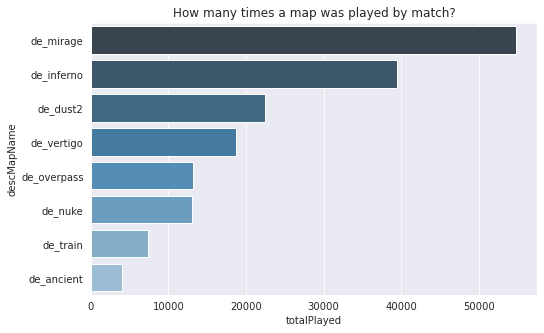

In [5]:
map_count = df_lobby[['idLobbyGame', 'descMapName']].drop_duplicates()
map_count = map_count['descMapName'].value_counts().to_frame().reset_index()
map_count.columns = ['descMapName', 'totalPlayed']

plt.figure(figsize=(8, 5))
sns.barplot(data=map_count, y='descMapName', x='totalPlayed', palette='Blues_r_d')
plt.title('How many times a map was played by match?')
plt.show()

## Map with most headshots

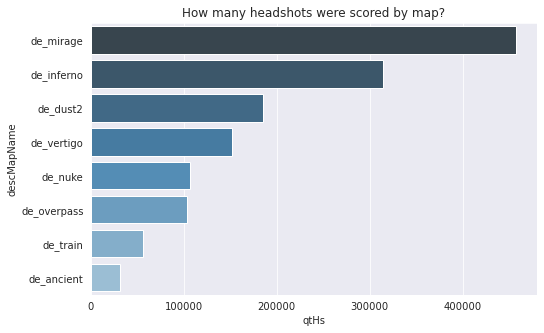

In [6]:
hs_sum = df_lobby.groupby('descMapName', as_index=False)['qtHs'].sum().sort_values('qtHs', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=hs_sum, y='descMapName', x='qtHs', palette='Blues_r_d')
plt.title('How many headshots were scored by map?')
plt.show()

## Map with the most headshot ratio

Take only unique values of _descMapName_ in each match

In [7]:
def calculate_hs_map_ratio(data):
    hs_sum = data.groupby('descMapName', as_index=False)['qtHs'].sum().sort_values('qtHs', ascending=False)
    
    map_count = data[['idLobbyGame', 'descMapName']].drop_duplicates()
    map_count = map_count['descMapName'].value_counts().to_frame().reset_index()
    map_count.columns = ['descMapName', 'totalPlayed']
    
    merge_hs_map = hs_sum.merge(map_count, on='descMapName')
    merge_hs_map['hsRatio'] = merge_hs_map['qtHs'] / merge_hs_map['totalPlayed']
    
    hs_map_ratio = merge_hs_map[['descMapName', 'hsRatio']].sort_values('hsRatio', ascending=False).reset_index(drop=True)
    hs_map_ratio.index += 1
    
    return hs_map_ratio

In [8]:
hs_map_ratio = calculate_hs_map_ratio(df_lobby)
print(hs_map_ratio)

   descMapName   hsRatio
1    de_mirage  8.346429
2     de_dust2  8.274512
3      de_nuke  8.189850
4   de_vertigo  8.130242
5   de_inferno  7.959308
6   de_ancient  7.893622
7  de_overpass  7.843430
8     de_train  7.687985


In [9]:
df_lobby['qtHs'].describe()

count    184152.000000
mean          7.640123
std           4.042324
min           0.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          41.000000
Name: qtHs, dtype: float64

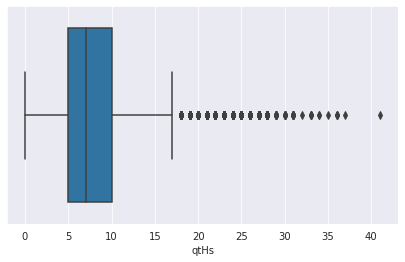

In [10]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(data=df_lobby, x='qtHs')
ax.set(xticks=list(range(0, 41, 5)))
plt.show()

## Headshot ratio without outliers

In [11]:
hs_map_ratio = calculate_hs_map_ratio(df_lobby[(df_lobby['qtHs'] >= 5) & (df_lobby['qtHs'] <= 10)])
print(hs_map_ratio)

   descMapName   hsRatio
1      de_nuke  7.592534
2     de_dust2  7.586207
3   de_inferno  7.574304
4    de_mirage  7.569248
5   de_vertigo  7.550312
6  de_overpass  7.537102
7   de_ancient  7.511369
8     de_train  7.474912
